In [20]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import chart_studio

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
covid_india = pd.read_csv('covid-19-india-case.csv')

In [4]:
covid_india=covid_india.dropna()

In [5]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH
0,AndhraPradesh,226.0,1.0,3.0
1,AndamanNicobar,10.0,0.0,0.0
2,Bihar,32.0,0.0,1.0
3,Chandigarh,18.0,7.0,0.0
4,Chhattisgarh,10.0,9.0,0.0


In [6]:
covid_india.dtypes

STATE NAME                    object
TOTAL CONFIRMED              float64
CURED/DISCHARGED/MIGRATED    float64
DEATH                        float64
dtype: object

In [7]:
covid_india['ACTIVE CASES'] = covid_india['TOTAL CONFIRMED'] - covid_india['CURED/DISCHARGED/MIGRATED'] - covid_india['DEATH']

In [8]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES
0,AndhraPradesh,226.0,1.0,3.0,222.0
1,AndamanNicobar,10.0,0.0,0.0,10.0
2,Bihar,32.0,0.0,1.0,31.0
3,Chandigarh,18.0,7.0,0.0,11.0
4,Chhattisgarh,10.0,9.0,0.0,1.0


In [9]:
covid_india['TOTAL CONFIRMED'] = covid_india['TOTAL CONFIRMED'].astype(int)
covid_india['CURED/DISCHARGED/MIGRATED'] = covid_india['CURED/DISCHARGED/MIGRATED'].astype(int)
covid_india['DEATH'] = covid_india['DEATH'].astype(int)
covid_india['ACTIVE CASES'] = covid_india['ACTIVE CASES'].astype(int)

In [10]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES
0,AndhraPradesh,226,1,3,222
1,AndamanNicobar,10,0,0,10
2,Bihar,32,0,1,31
3,Chandigarh,18,7,0,11
4,Chhattisgarh,10,9,0,1


In [11]:
covid_india.style.background_gradient(cmap = 'Reds')

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES
0,AndhraPradesh,226,1,3,222
1,AndamanNicobar,10,0,0,10
2,Bihar,32,0,1,31
3,Chandigarh,18,7,0,11
4,Chhattisgarh,10,9,0,1
5,Delhi,576,21,7,548
6,Goa,7,0,0,7
7,Gujarat,165,25,13,127
8,Haryana,90,25,1,64
9,HimachalPradesh,13,2,1,10


In [12]:
total_active = covid_india.groupby('STATE NAME')['TOTAL CONFIRMED'].sum().sort_values(ascending = False).to_frame()

total_active.head()

,TOTAL CONFIRMED
STATE NAME,
Maharashtra,868
TamilNadu,621
Delhi,576
Telengana,364
Kerala,327


In [13]:
total_active.style.background_gradient(cmap = 'Reds')

,TOTAL CONFIRMED
STATE NAME,
Maharashtra,868
TamilNadu,621
Delhi,576
Telengana,364
Kerala,327
UttarPradesh,305
MP,229
Rajasthan,228
AndhraPradesh,226


In [14]:
covid_india.iplot(kind='bar',x='STATE NAME',y='TOTAL CONFIRMED',
                  title='State wise Covid-19 Cases',xTitle='State',yTitle='Total Cases')

In [15]:
fig=px.bar(covid_india,x="STATE NAME",y="TOTAL CONFIRMED",color='TOTAL CONFIRMED',title='Total cases in India')
fig.show()

In [16]:
fig=px.bar(covid_india,x="STATE NAME",y="DEATH",color='DEATH',title='Total Death in India')
fig.show()

In [17]:
fig=px.bar(covid_india,x="STATE NAME",y="CURED/DISCHARGED/MIGRATED",color='CURED/DISCHARGED/MIGRATED',
           title='Total Cases Close in India')
fig.show()

In [18]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES
0,AndhraPradesh,226,1,3,222
1,AndamanNicobar,10,0,0,10
2,Bihar,32,0,1,31
3,Chandigarh,18,7,0,11
4,Chhattisgarh,10,9,0,1


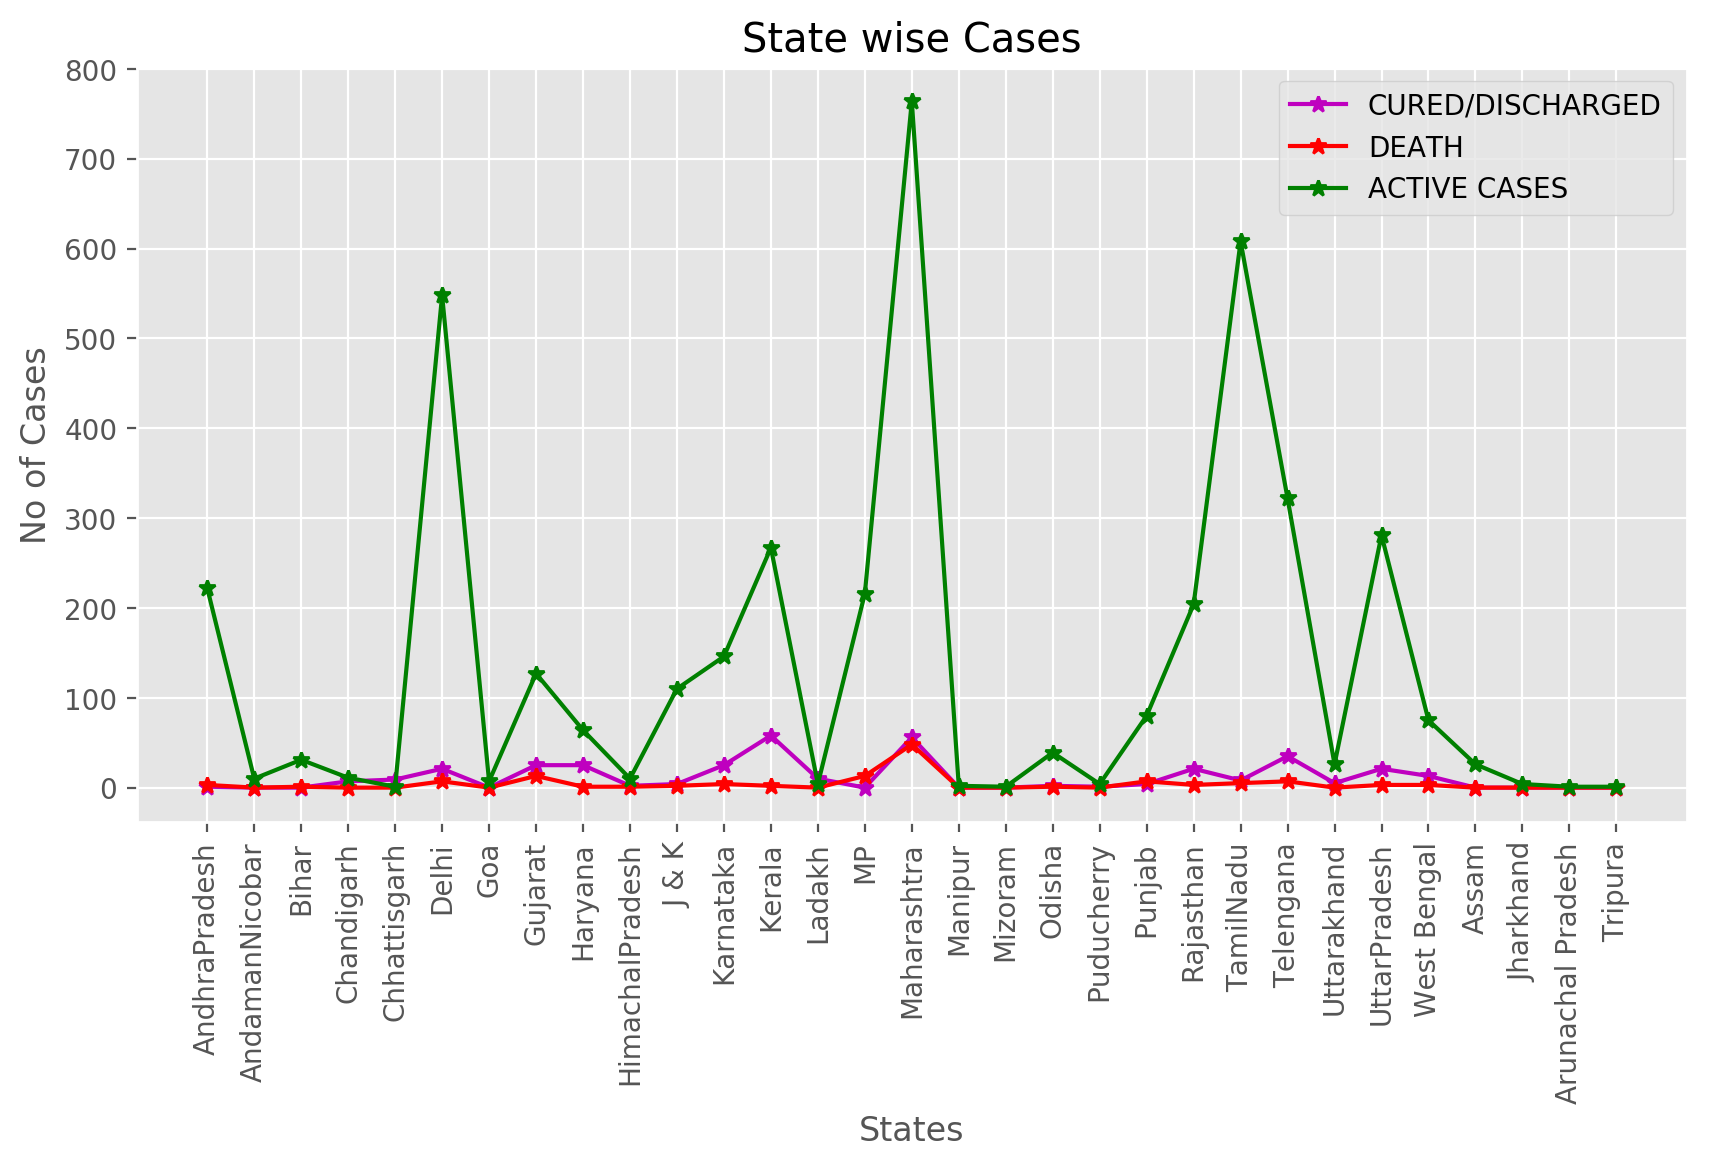

In [19]:
plt.figure(figsize=(10,5),dpi=200)

#plt.plot(covid_india['STATE NAME'], covid_india['TOTAL CONFIRMED'], label='Math marks', color='r')
plt.plot(covid_india['STATE NAME'], covid_india['CURED/DISCHARGED/MIGRATED'], label='CURED/DISCHARGED',marker='*', color='m')
plt.plot(covid_india['STATE NAME'], covid_india['DEATH'],marker='*', label='DEATH', color='r')
plt.plot(covid_india['STATE NAME'], covid_india['ACTIVE CASES'],marker='*', label='ACTIVE CASES', color='g')

plt.xticks(covid_india['STATE NAME'], rotation=90)
plt.xlabel('States')
plt.ylabel('No of Cases')
plt.title('State wise Cases')

plt.legend()
plt.show()

